<a href="https://colab.research.google.com/github/justcating/pypairs/blob/main/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [12]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак - мінімум 2 ящика та гістограм
* аналіз категоріальних ознак - мінімум 1 груповий ящик
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

Зверніть увагу, що стовпчик `pclass` є по суті категоріальним, тому перед початком роботи змініть його тип даних на `object`

In [13]:
df["pclass"] = df["pclass"].astype(str)

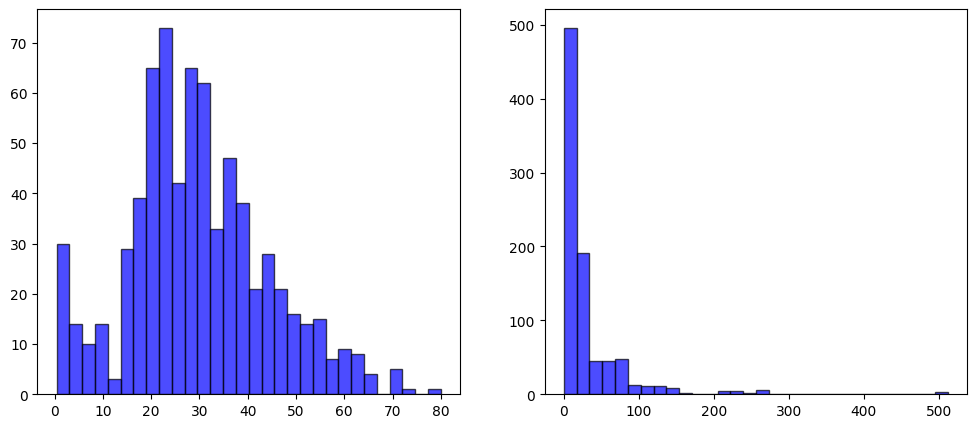

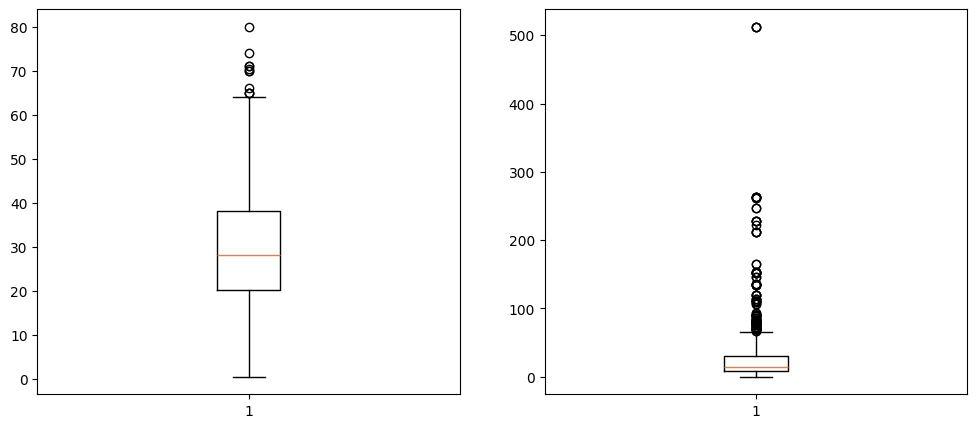

In [14]:
num_features = ["age", "fare"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_features):
    plt.subplot(1, 2, i+1)
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.show()

plt.figure(figsize=(12, 5))
for i, col in enumerate(num_features):
    plt.subplot(1, 2, i+1)
    plt.boxplot(df[col].dropna(), vert=True)
plt.show()

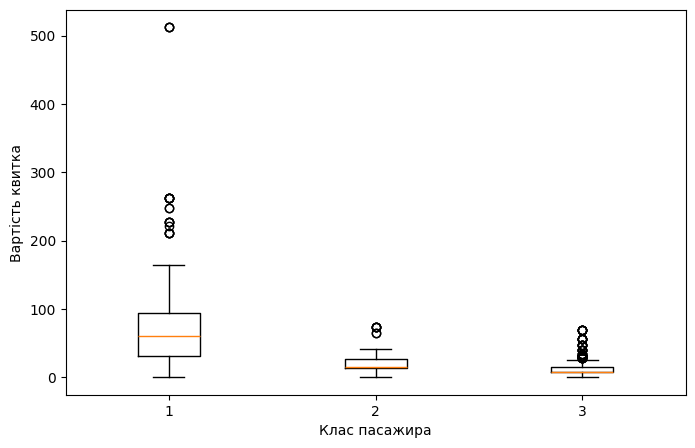

In [16]:
pclass_fares = [df[df["pclass"] == i]["fare"].dropna().values for i in ["1", "2", "3"]]
plt.figure(figsize=(8, 5))
plt.boxplot(pclass_fares)
plt.xlabel("Клас пасажира")
plt.ylabel("Вартість квитка")
plt.show()

In [17]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))).sum()
print("Кількість викидів у числових ознаках:")
print(outliers)


Кількість викидів у числових ознаках:
age      11
fare    116
dtype: int64
